<a href="https://colab.research.google.com/github/RichardRajesh/5731-Computational-methods/blob/main/Rajesh_Bodas_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from gensim.models import Word2Vec
#from sentence_transformers import SentenceTransformer
from sklearn.naive_bayes import MultinomialNB


In [ ]:

with open("sample_data/stsa-train.txt") as txtf:
    line_list_of_words = [line.rstrip('\n') for line in txtf]

labels_using = []
text_data = []

for i, line in enumerate(line_list_of_words):
    label = line_list_of_words[i][0]
    tex = line_list_of_words[i][1:]
    labels_using.append(label)
    text_data.append(tex)

Input_Data = pd.DataFrame(list(zip(labels_using, text_data)), columns=['Reviews', 'Text'])

# Preprocess data
import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocessing_related_sentence(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [stemmer.stem(w) for w in filtered_words]
    lemma_words = [lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

Input_Data['cleanText'] = Input_Data['Text'].map(lambda s: preprocessing_related_sentence(s))

In [ ]:


# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(Input_Data["cleanText"], Input_Data["Reviews"], test_size=0.2, random_state=202)

# Vectorize text data
vectorizer = CountVectorizer()
x_train_vectorized_training = vectorizer.fit_transform(x_train)
x_valid_vectorized_validation = vectorizer.transform(x_valid)

# Classification
NB_classifier = MultinomialNB()
NB_model = NB_classifier.fit(x_train_vectorized_training, y_train)

# Evaluate on validation set
pred_valid_NB = NB_classifier.predict(x_valid_vectorized_validation)

print("Accuracy of the NB model on validation dataset:", round(accuracy_score(y_valid, pred_valid_NB) * 100), "%")
print("Precision of the NB model on validation dataset:", round(precision_score(y_valid, pred_valid_NB, pos_label='0') * 100), "%")
print("Recall of the NB model on validation dataset:", round(recall_score(y_valid, pred_valid_NB, pos_label='0') * 100), "%")
print("F1 Score of the NB on validation dataset:", round(f1_score(y_valid, pred_valid_NB, pos_label='0') * 100), "%")



In [ ]:
# Load test data
# Load test data
with open("sample_data/stsa-test.txt") as test_file:
    All_testing_lines = [line.rstrip('\n') for line in test_file]

All_testing_labels = []
testing_text_data = []

for line in All_testing_lines:
    label = line[0]
    text = line[1:]
    All_testing_labels.append(label)
    testing_text_data.append(text)

testing_dataset = pd.DataFrame(list(zip(All_testing_labels, testing_text_data)), columns=['Reviews', 'Text'])

# Preprocess test data
testing_dataset['cleanText'] = testing_dataset['Text'].map(lambda s: preprocessing_related_sentence(s))

# Vectorize test data
x_test_vectorized_data = vectorizer.transform(testing_dataset["cleanText"])

# Evaluate on test set
pred_test_NB = NB_classifier.predict(x_test_vectorized_data)

print("Accuracy of the Naive Bayes model on test set:", round(accuracy_score(testing_dataset["Reviews"], pred_test_NB) * 100), "%")
print("Precision of the Naive Bayes model on test set:", round(precision_score(testing_dataset["Reviews"], pred_test_NB, pos_label='0') * 100), "%")
print("Recall of the Naive Bayes model on test set:", round(recall_score(testing_dataset["Reviews"], pred_test_NB, pos_label='0') * 100), "%")
print("F1 Score of the Naive Bayes model on test set:", round(f1_score(testing_dataset["Reviews"], pred_test_NB, pos_label='0') * 100), "%")



Accuracy of the Naive Bayes model on test set: 80 %
Precision of the Naive Bayes model on test set: 82 %
Recall of the Naive Bayes model on test set: 76 %
F1 Score of the Naive Bayes model on test set: 79 %


In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_classifier = SVC()
svm_model = svm_classifier.fit(x_train_vectorized_training, y_train)

# Evaluate on validation set
pred_valid_svm = svm_classifier.predict(x_valid_vectorized_validation)

print("SVM Model Evaluation on Validation Set:")
print("Accuracy:", round(accuracy_score(y_valid, pred_valid_svm) * 100), "%")
print("Precision:", round(precision_score(y_valid, pred_valid_svm, pos_label='0') * 100), "%")
print("Recall:", round(recall_score(y_valid, pred_valid_svm, pos_label='0') * 100), "%")
print("F1 Score:", round(f1_score(y_valid, pred_valid_svm, pos_label='0') * 100), "%")

# 10-fold cross-validation
svm_accuracy = cross_val_score(estimator=svm_classifier, X=x_train_vectorized_training, y=y_train, cv=10)
print("SVM Model 10-fold Cross Validation Score on Training Set:", round(svm_accuracy.mean() * 100), "%")

# Evaluate on test set
pred_test_svm = svm_classifier.predict(x_test_vectorized_data)

print("SVM Model Evaluation on Test Set:")
print("Accuracy:", round(accuracy_score(testing_dataset["Reviews"], pred_test_svm) * 100), "%")
print("Precision:", round(precision_score(testing_dataset["Reviews"], pred_test_svm, pos_label='0') * 100), "%")
print("Recall:", round(recall_score(testing_dataset["Reviews"], pred_test_svm, pos_label='0') * 100), "%")
print("F1 Score:", round(f1_score(testing_dataset["Reviews"], pred_test_svm, pos_label='0') * 100), "%")


SVM Model Evaluation on Validation Set:
Accuracy: 77 %
Precision: 76 %
Recall: 76 %
F1 Score: 76 %
SVM Model 10-fold Cross Validation Score on Training Set: 75 %
SVM Model Evaluation on Test Set:
Accuracy: 77 %
Precision: 79 %
Recall: 75 %
F1 Score: 77 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_classifier = KNeighborsClassifier()
knn_model = knn_classifier.fit(x_train_vectorized_training, y_train)

# Evaluate on validation set
pred_valid_knn = knn_classifier.predict(x_valid_vectorized_validation)

print("KNN Model Evaluation on Validation Set:")
print("Accuracy:", round(accuracy_score(y_valid, pred_valid_knn) * 100), "%")
print("Precision:", round(precision_score(y_valid, pred_valid_knn, pos_label='0') * 100), "%")
print("Recall:", round(recall_score(y_valid, pred_valid_knn, pos_label='0') * 100), "%")
print("F1 Score:", round(f1_score(y_valid, pred_valid_knn, pos_label='0') * 100), "%")

# 10-fold cross-validation
knn_accuraciy = cross_val_score(estimator=knn_classifier, X=x_train_vectorized_training, y=y_train, cv=10)
print("KNN Model 10-fold Cross Validation Score on Training Set:", round(knn_accuraciy.mean() * 100), "%")

# Evaluate on test set
pred_test_knn = knn_classifier.predict(x_test_vectorized_data)

print("KNN Model Evaluation on Test Set:")
print("Accuracy:", round(accuracy_score(testing_dataset["Reviews"], pred_test_knn) * 100), "%")
print("Precision:", round(precision_score(testing_dataset["Reviews"], pred_test_knn, pos_label='0') * 100), "%")
print("Recall:", round(recall_score(testing_dataset["Reviews"], pred_test_knn, pos_label='0') * 100), "%")
print("F1 Score:", round(f1_score(testing_dataset["Reviews"], pred_test_knn, pos_label='0') * 100), "%")


KNN Model Evaluation on Validation Set:
Accuracy: 55 %
Precision: 53 %
Recall: 71 %
F1 Score: 60 %
KNN Model 10-fold Cross Validation Score on Training Set: 55 %
KNN Model Evaluation on Test Set:
Accuracy: 55 %
Precision: 54 %
Recall: 69 %
F1 Score: 60 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
DT_classifier = DecisionTreeClassifier()
decision_tree_model = DT_classifier.fit(x_train_vectorized_training, y_train)

# Evaluate on validation set
predictions_valid_DT = DT_classifier.predict(x_valid_vectorized_validation)

print("Decision Tree Model Evaluation on Validation Set:")
print("Accuracy:", round(accuracy_score(y_valid, predictions_valid_DT) * 100), "%")
print("Precision:", round(precision_score(y_valid, predictions_valid_DT, pos_label='0') * 100), "%")
print("Recall:", round(recall_score(y_valid, predictions_valid_DT, pos_label='0') * 100), "%")
print("F1 Score:", round(f1_score(y_valid, predictions_valid_DT, pos_label='0') * 100), "%")

# 10-fold cross-validation
DT_accurcy = cross_val_score(estimator=DT_classifier, X=x_train_vectorized_training, y=y_train, cv=10)
print("Decision Tree Model 10-fold Cross Validation Score on Training Set:", round(DT_accurcy.mean() * 100), "%")

# Evaluate on test set
pred_test_DT = DT_classifier.predict(x_test_vectorized_data)

print("Decision Tree Model Evaluation on Test Set:")
print("Accuracy:", round(accuracy_score(testing_dataset["Reviews"], pred_test_DT) * 100), "%")
print("Precision:", round(precision_score(testing_dataset["Reviews"], pred_test_DT, pos_label='0') * 100), "%")
print("Recall:", round(recall_score(testing_dataset["Reviews"], pred_test_DT, pos_label='0') * 100), "%")
print("F1 Score:", round(f1_score(testing_dataset["Reviews"], pred_test_DT, pos_label='0') * 100), "%")


Decision Tree Model Evaluation on Validation Set:
Accuracy: 67 %
Precision: 64 %
Recall: 69 %
F1 Score: 67 %
Decision Tree Model 10-fold Cross Validation Score on Training Set: 67 %
Decision Tree Model Evaluation on Test Set:
Accuracy: 68 %
Precision: 67 %
Recall: 70 %
F1 Score: 68 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
RF_Classifier = RandomForestClassifier()
random_forest_model = RF_Classifier.fit(x_train_vectorized_training, y_train)

# Evaluate on validation set
predictions_valid_RF = RF_Classifier.predict(x_valid_vectorized_validation)

print("Random Forest Model Evaluation on Validation Set:")
print("Accuracy:", round(accuracy_score(y_valid, predictions_valid_RF) * 100), "%")
print("Precision:", round(precision_score(y_valid, predictions_valid_RF, pos_label='0') * 100), "%")
print("Recall:", round(recall_score(y_valid, predictions_valid_RF, pos_label='0') * 100), "%")
print("F1 Score:", round(f1_score(y_valid, predictions_valid_RF, pos_label='0') * 100), "%")

# 10-fold cross-validation
RF_accuracy = cross_val_score(estimator=RF_Classifier, X=x_train_vectorized_training, y=y_train, cv=10)
print("Random Forest Model 10-fold Cross Validation Score on Training Set:", round(RF_accuracy.mean() * 100), "%")

# Evaluate on test set
predictions_test_RF = RF_Classifier.predict(x_test_vectorized_data)

print("Random Forest Model Evaluation on Test Set:")
print("Accuracy:", round(accuracy_score(testing_dataset["Reviews"], predictions_test_RF) * 100), "%")
print("Precision:", round(precision_score(testing_dataset["Reviews"], predictions_test_RF, pos_label='0') * 100), "%")
print("Recall:", round(recall_score(testing_dataset["Reviews"], predictions_test_RF, pos_label='0') * 100), "%")
print("F1 Score:", round(f1_score(testing_dataset["Reviews"], predictions_test_RF, pos_label='0') * 100), "%")


Random Forest Model Evaluation on Validation Set:
Accuracy: 72 %
Precision: 70 %
Recall: 73 %
F1 Score: 72 %
Random Forest Model 10-fold Cross Validation Score on Training Set: 72 %
Random Forest Model Evaluation on Test Set:
Accuracy: 75 %
Precision: 73 %
Recall: 77 %
F1 Score: 75 %


In [ ]:
import xgboost as xgb
# Convert target classes to numerical values
y_train_numeric = y_train.astype(int)
y_valid_numeric = y_valid.astype(int)
y_test_numeric = testing_dataset["Reviews"].astype(int)

# Train XGBoost model
xgb_classifier = xgb.XGBClassifier()
xgb_model = xgb_classifier.fit(x_train_vectorized_training, y_train_numeric)

# Evaluate on validation set
pred_valid_xgb = xgb_classifier.predict(x_valid_vectorized_validation)

print("XGBoost Model Evaluation on Validation Set:")
print("Accuracy:", round(accuracy_score(y_valid_numeric, pred_valid_xgb) * 100), "%")
print("Precision:", round(precision_score(y_valid_numeric, pred_valid_xgb) * 100), "%")
print("Recall:", round(recall_score(y_valid_numeric, pred_valid_xgb) * 100), "%")
print("F1 Score:", round(f1_score(y_valid_numeric, pred_valid_xgb) * 100), "%")

# 10-fold cross-validation
xgboost_accuracy = cross_val_score(estimator=xgb_classifier, X=x_train_vectorized_training, y=y_train_numeric, cv=10)
print("XGBoost Model 10-fold Cross Validation Score on Training Set:", round(xgboost_accuracy.mean() * 100), "%")

# Evaluate on test set
with open("sample_data/stsa-test.txt") as txtf:
    test_data = [line.rstrip('\n') for line in txtf]

# Extract labels and text from the test dataset
labels_test = [line[0] for line in test_data]
text_test = [line[1:] for line in test_data]

# Preprocess the test data
processed_text_test = [preprocessing_related_sentence(sentence) for sentence in text_test]

# Convert text to vector using the same vectorizer used for training
x_test_vectorized = vectorizer.transform(processed_text_test)

# Convert target classes to numerical values
y_test_numeric = np.array(labels_test).astype(int)

# Evaluate on test set
predictions_test_set_xgb = xgb_classifier.predict(x_test_vectorized)

print("XGBoost Model Evaluation on Test Set:")
print("Accuracy:", round(accuracy_score(y_test_numeric, predictions_test_set_xgb) * 100), "%")
print("Precision:", round(precision_score(y_test_numeric, predictions_test_set_xgb) * 100), "%")
print("Recall:", round(recall_score(y_test_numeric, predictions_test_set_xgb) * 100), "%")
print("F1 Score:", round(f1_score(y_test_numeric, predictions_test_set_xgb) * 100), "%")



XGBoost Model Evaluation on Validation Set:
Accuracy: 71 %
Precision: 69 %
Recall: 82 %
F1 Score: 75 %
XGBoost Model 10-fold Cross Validation Score on Training Set: 71 %
XGBoost Model Evaluation on Test Set:
Accuracy: 70 %
Precision: 67 %
Recall: 81 %
F1 Score: 73 %


In [ ]:
with open("sample_data/stsa-test.txt") as txtf:
    mylist_test = [line.rstrip('\n') for line in txtf]

labels_test = []
text_test = []

for i, line in enumerate(mylist_test):
    label_test = mylist_test[i][0]
    tex_test = mylist_test[i][1:]
    labels_test.append(label_test)
    text_test.append(tex_test)

dataset_test = pd.DataFrame(list(zip(labels_test, text_test)),columns =['Reviews', 'Text'])
dataset_test.head()

,Reviews,Text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


In [ ]:

import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


dataset_test['cleanText']=dataset_test['Text'].map(lambda s:preprocess(s))
dataset_test.head()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


,Reviews,Text,cleanText
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch

# Load pre-trained BERT tokenizer and model
Bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
Bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize your text data (assuming it's already preprocessed)
tokenized_text = [Bert_tokenizer.encode(text, max_length=128, truncation=True) for text in dataset_test['cleanText']]

# Pad tokenized sequences to ensure uniform length
max_len = max(len(tokenized_seq) for tokenized_seq in tokenized_text)
padded_seqn = [seq + [0]*(max_len - len(seq)) for seq in tokenized_text]

# Convert tokenized sequences to PyTorch tensors
input = torch.tensor(padded_seqn)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(input, dataset_test["Reviews"], test_size=0.2, random_state=202)

# Fine-tune BERT model
# Define optimizer and loss function (this may need further customization based on your specific task)
optimizer = torch.optim.AdamW(Bert_model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Define number of epochs
num_epochs = 3

# Train the model
for epoch in range(num_epochs):
    Bert_model.train()
    total_loss = 0
    for input_batch, labels_batch in zip(x_train, y_train):
        optimizer.zero_grad()
        input_batch = input_batch.unsqueeze(0)  # Add batch dimension
        labels_batch = torch.tensor(int(labels_batch))  # Convert label to tensor
        outputs = Bert_model(input_ids=input_batch, labels=labels_batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print("Epoch:", epoch+1, "Loss:", total_loss)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch: 1 Loss: 1031.0820048451424
Epoch: 2 Loss: 1019.3549735248089
Epoch: 3 Loss: 1015.7842617928982


In [ ]:
# Evaluate the model on test set
Bert_model.eval()
with torch.no_grad():
    outputs = Bert_model(input_ids=x_test)
    BERT_predictions = torch.argmax(outputs.logits, dim=1)

# Convert string labels in y_test to integers
y_test_numeric = y_test.astype(int)

print("BERT Model Evaluation:")
print("Accuracy:", round(accuracy_score(y_test_numeric, BERT_predictions.numpy()) * 100, 2), "%")
print("Precision:", round(precision_score(y_test_numeric, BERT_predictions.numpy()) * 100, 2), "%")
print("Recall:", round(recall_score(y_test_numeric, BERT_predictions.numpy()) * 100, 2), "%")
print("F1 Score:", round(f1_score(y_test_numeric, BERT_predictions.numpy()) * 100, 2), "%")


BERT Model Evaluation:
Accuracy: 48.49 %
Precision: 0.0 %
Recall: 0.0 %
F1 Score: 0.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from sklearn.svm import SVC
import numpy as np

# Load the training data
with open("sample_data/stsa-train.txt") as txtf:
    train_data = [line.rstrip('\n') for line in txtf]

# Split the data into features (X) and target (y)
X = [line[1:] for line in train_data]
y = [line[0] for line in train_data]

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Word2Vec model
text_data = [text.split() for text in X_train]
word2vec_model = Word2Vec(text_data, vector_size=100, window=5, min_count=1, workers=4)

# Convert text data into Word2Vec embeddings for training data
X_train_word2vec = np.zeros((len(X_train), 100))
for i, text in enumerate(X_train):
    words = text.split()
    embeddings = []
    for word in words:
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
    if embeddings:
        X_train_word2vec[i] = np.mean(embeddings, axis=0)

# Convert text data into Word2Vec embeddings for validation data
X_valid_word2vec = np.zeros((len(X_valid), 100))
for i, text in enumerate(X_valid):
    words = text.split()
    embeddings = []
    for word in words:
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
    if embeddings:
        X_valid_word2vec[i] = np.mean(embeddings, axis=0)

# Train a classifier using SVM
svm_classifier = SVC()
svm_classifier.fit(X_train_word2vec, y_train)

# Evaluate the model on the validation set
pred_valid = svm_classifier.predict(X_valid_word2vec)
accuracy = accuracy_score(y_valid, pred_valid)
precision = precision_score(y_valid, pred_valid, pos_label='1')  # Specify the positive label as '1'
recall = recall_score(y_valid, pred_valid, pos_label='1')  # Specify the positive label as '1'
f1 = f1_score(y_valid, pred_valid, pos_label='1')  # Specify the positive label as '1'

print("Validation Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Validation Set Metrics:
Accuracy: 0.5151734104046243
Precision: 0.5151734104046243
Recall: 1.0
F1 Score: 0.6800190748688603


In [ ]:
# Load the test data
with open("sample_data/stsa-test.txt") as txtf:
    test_data = [line.rstrip('\n') for line in txtf]

# Split the test data into labels and text
y_test = [line[0] for line in test_data]
X_test = [line[1:] for line in test_data]

# Convert text data into Word2Vec embeddings
X_test_word2vec = np.zeros((len(X_test), 100))
for i, text in enumerate(X_test):
    words = text.split()
    embeddings = []
    for word in words:
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
    if embeddings:
        X_test_word2vec[i] = np.mean(embeddings, axis=0)

# Evaluate the model on the test set
pred_test = svm_classifier.predict(X_test_word2vec)
accuracy_test = accuracy_score(y_test, pred_test)
precision_test = precision_score(y_test, pred_test, pos_label='1')  # Specify the positive label as '1'
recall_test = recall_score(y_test, pred_test, pos_label='1')  # Specify the positive label as '1'
f1_test = f1_score(y_test, pred_test, pos_label='1')  # Specify the positive label as '1'

print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)



Test Set Metrics:
Accuracy: 0.49917627677100496
Precision: 0.49917627677100496
Recall: 1.0
F1 Score: 0.6659340659340659


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [1]:
pip install pandas scikit-learn gensim


In [2]:
pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
#from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import numpy as np
import torch


In [7]:
# Install necessary libraries
!pip install pandas scikit-learn gensim nltk transformers torch

# Import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import torch

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pip install sentence-transformers


In [8]:
from sentence_transformers import SentenceTransformer


In [9]:
input_df = pd.read_csv('Nwebmd100.csv')

# Preprocessing functions
def tokenizer(text):
    if pd.isnull(text):
        return []  # Return an empty list if the text is NaN
    return word_tokenize(str(text).lower())  # Convert to string before lowercasing

# Word2Vec model training
model_word2vec = Word2Vec(sentences=input_df['Reviews'].apply(tokenizer),
                          vector_size=100, window=5, min_count=1, workers=4)

# Compute embeddings for each review
def compute_word2vec_embeddings(review):
    tokens = tokenizer(review)
    embeddings = [model_word2vec.wv[word] for word in tokens if word in model_word2vec.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model_word2vec.vector_size)  # Return zero vector if no embeddings are found

input_df['Word2Vec_Embeddings'] = input_df['Reviews'].apply(compute_word2vec_embeddings)

# Remove rows where Word2Vec embeddings could not be computed
input_df = input_df[input_df['Word2Vec_Embeddings'].apply(lambda x: len(x) > 0)]

# K-means clustering
kmeans_clustering = KMeans(n_clusters=5, random_state=42)
input_df['KMeans_Cluster'] = kmeans_clustering.fit_predict(input_df['Word2Vec_Embeddings'].tolist())

# DBSCAN clustering
dbscan_clustering = DBSCAN(eps=0.5, min_samples=5)
input_df['DBSCAN_Cluster'] = dbscan_clustering.fit_predict(input_df['Word2Vec_Embeddings'].tolist())

# Hierarchical clustering
hierarchical_type_clustering = AgglomerativeClustering(n_clusters=5)
input_df['Hierarchical_Cluster'] = hierarchical_type_clustering.fit_predict(input_df['Word2Vec_Embeddings'].tolist())

# Replace NaN values with empty strings in the 'Reviews' column
input_df['Reviews'].fillna('', inplace=True)

# BERT embeddings
sentence_related_model = SentenceTransformer('bert-base-nli-mean-tokens')
bert_embeddings = sentence_related_model.encode(input_df['Reviews'].tolist(), show_progress_bar=True)

# K-means clustering with BERT embeddings
km_bert = KMeans(n_clusters=5, random_state=42)
input_df['KMeans_BERT_Cluster'] = km_bert.fit_predict(bert_embeddings)

# DBSCAN clustering with BERT embeddings
dbs_bert = DBSCAN(eps=0.5, min_samples=5)
input_df['DBSCAN_BERT_Cluster'] = dbs_bert.fit_predict(bert_embeddings)

# Hierarchical clustering with BERT embeddings
hiera_bert = AgglomerativeClustering(n_clusters=5)
input_df['Hierarchical_BERT_Cluster'] = hiera_bert.fit_predict(bert_embeddings)

# Save the DataFrame with clusters to a new CSV file
input_df.to_csv('clustered_data_with.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT Cluster formations

Bert Cluster Formation

In [10]:
input_df = pd.read_csv('Nwebmd100.csv')

# BERT model initialization
tokenizing = BertTokenizer.from_pretrained('bert-base-uncased')
Modelling_with_bert = BertModel.from_pretrained('bert-base-uncased')

# Function to compute BERT embeddings for a review
def compute_bert_embdng(review):
    inputs = tokenizing(review, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = Modelling_with_bert(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Compute BERT embeddings for each review
input_df['BERT_Embeddings'] = input_df['Reviews'].apply(lambda x: compute_bert_embdng(str(x)))  # Ensure input is string

# Remove rows where BERT embeddings could not be computed
input_df = input_df[input_df['BERT_Embeddings'].apply(lambda x: len(x) > 0)]

# K-means clustering using BERT embeddings
bert_km = KMeans(n_clusters=5, random_state=42)
input_df['KMeans_Cluster_BERT'] = bert_km.fit_predict(input_df['BERT_Embeddings'].tolist())

# DBSCAN clustering using BERT embeddings
bert_db = DBSCAN(eps=0.5, min_samples=5)
input_df['DBSCAN_Cluster_BERT'] = bert_db.fit_predict(input_df['BERT_Embeddings'].tolist())

# Hierarchical clustering using BERT embeddings
bert_hiera = AgglomerativeClustering(n_clusters=5)
input_df['Hierarchical_Cluster_BERT'] = bert_hiera.fit_predict(input_df['BERT_Embeddings'].tolist())

# Save the DataFrame with clusters to a new CSV file
input_df.to_csv('clustered_data_with_bert.csv', index=False)



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


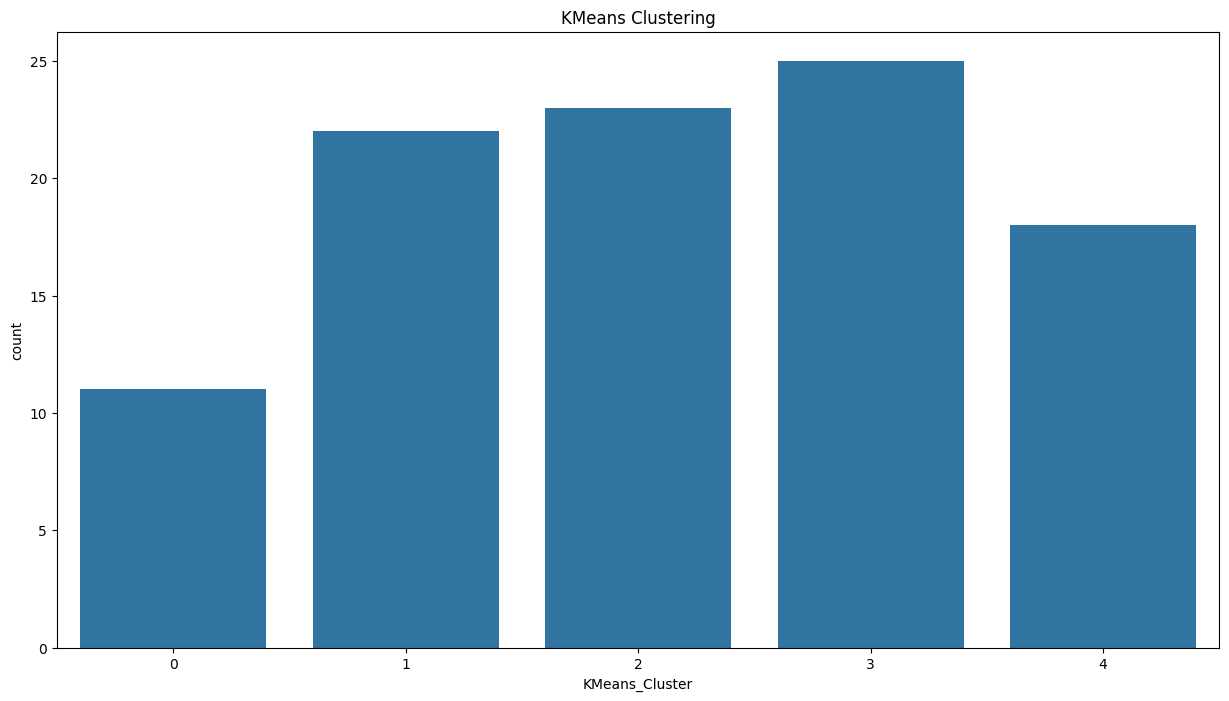

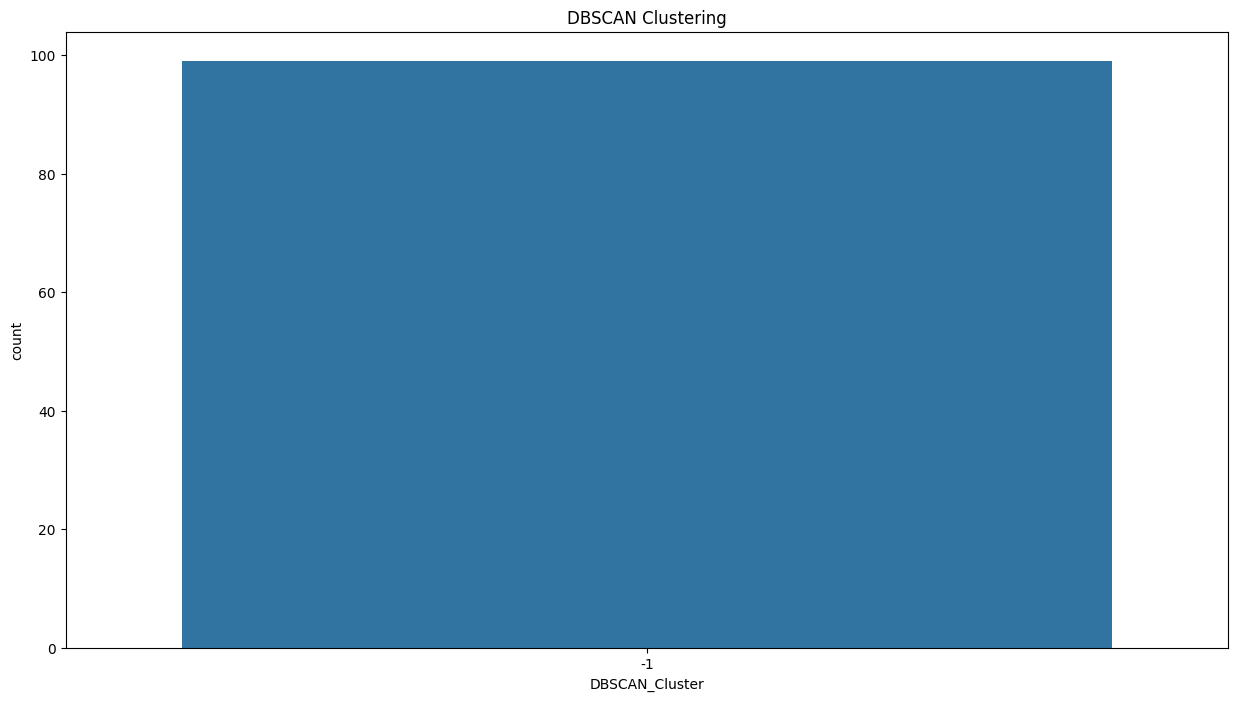

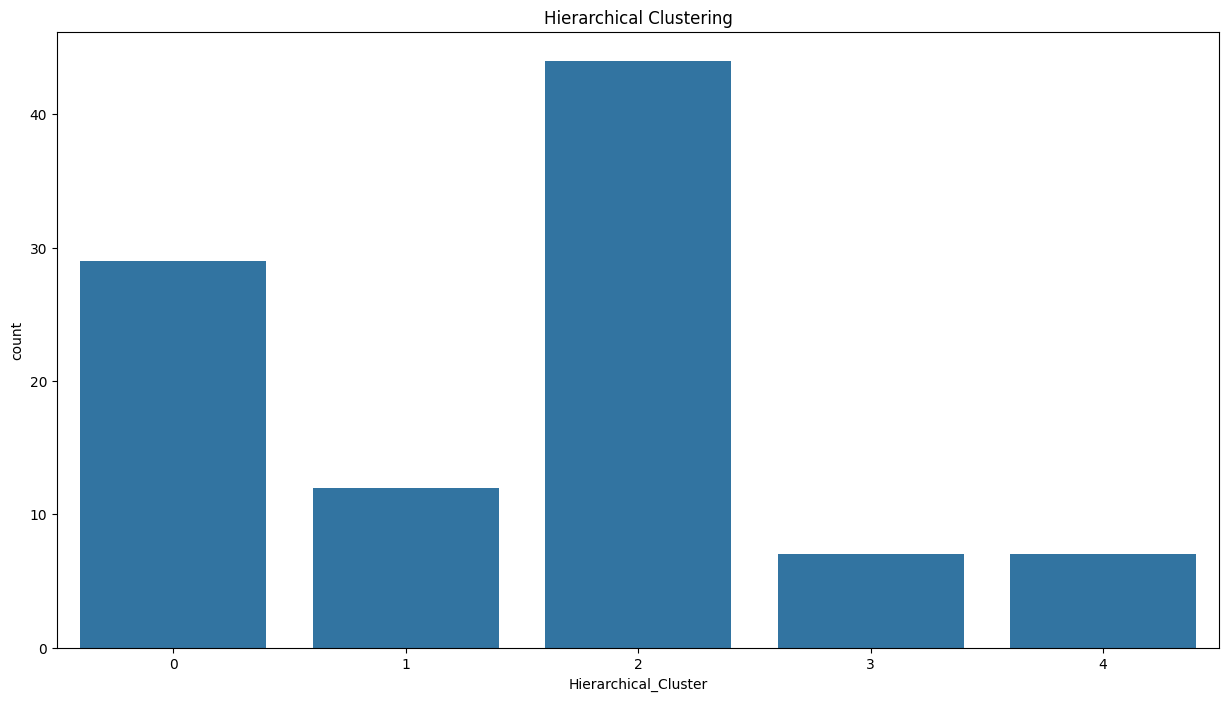

Samples KM Cluster 0:
6     gotten pregnant job switched brand another gen...
34                            used drug going menopause
41    heavy clots fibroids lysteda cut bleeding lets...
48    ablation novasure years ago work fibroids lyst...
51    heavy painful periods life worse teens came ba...
Name: Processed_Reviews, dtype: object


In [11]:


input_df = pd.read_csv('Nwebmd100.csv')


input_df.dropna(subset=['Reviews'], inplace=True)

All_stop_words_data = set(stopwords.words('english'))

def preprocessing_text_input_data(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in All_stop_words_data]
    return ' '.join(words)

input_df['Processed_Reviews'] = input_df['Reviews'].apply(preprocessing_text_input_data)

vectorizing = TfidfVectorizer()
X = vectorizing.fit_transform(input_df['Processed_Reviews'])


km = KMeans(n_clusters=5, random_state=42)
input_df['KMeans_Cluster'] = km.fit_predict(X)


db = DBSCAN(eps=0.5, min_samples=5)
input_df['DBSCAN_Cluster'] = db.fit_predict(X)


clustering_ag = AgglomerativeClustering(n_clusters=5)
input_df['Hierarchical_Cluster'] = clustering_ag.fit_predict(X.toarray())

model_word2vec = Word2Vec(sentences=[word_tokenize(review) for review in input_df['Processed_Reviews']], vector_size=100, window=5, min_count=1, workers=4)
input_df['Word2Vec_Cluster'] = input_df['Processed_Reviews'].apply(lambda x: [model_word2vec.wv[word] for word in word_tokenize(x) if word in model_word2vec.wv]).apply(lambda x: sum(x) / len(x) if len(x) > 0 else [0]*100)



plt.figure(figsize=(15, 8))
sns.countplot(x='KMeans_Cluster', data=input_df)
plt.title('KMeans Clustering')
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(x='DBSCAN_Cluster', data=input_df)
plt.title('DBSCAN Clustering')
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(x='Hierarchical_Cluster', data=input_df)
plt.title('Hierarchical Clustering')
plt.show()

print("Samples KM Cluster 0:")
print(input_df[input_df['KMeans_Cluster'] == 0]['Processed_Reviews'].head())





**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

For text clustering we have performed above, the dataset contains Word2Vec, BERT, DBSCAN, K-means, and Hierarchical clustering. By reducing squared distances, K-means clusters in the data and places each review in a single cluster according to Word2Vec embeddings. The DBSCAN detects clusters of random shapes by grouping closely spaced points in the database used. whereas the hierarchical clustering By iteratively joining or dividing clusters according to a distance metric, creates a tree of clusters. The Word2Vec embeddings formed computes similarity between words or documents by representing words as dense vectors in a continuous vector space, thus capturing semantic links between words. In contrast the Deep contextual information and semantic meaning are captured by the transformer-based BERT model, which learns contextualized representations of words and phrases. Every clustering technique has advantages and disadvantages. For example, BERT is an effective contextual embedding model, Word2Vec captures semantic links but lacks context, DBSCAN is robust to noise, and K-means is quick and easy to use.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
The Exercisise is obviously a hell lot of work. Its very challenging and intresting too. I should say there is lot
to learn, and have been exposed to a lot number of new terms such as embedings, DBSCAN clusters etc. Its intrest to try
out the cluster formations using different types on the public datasets and understand their base working in terms of
forming clusters. However i felt there is very less time given for this assignment and its obviously insuffecient to
cover these many topics. So, overall the assignment is very knowledgeble.





'''

'\nThe Exercisise is obviously a hell lot of work. Its very challenging and intresting too. I should say there is lot to learn, and have been exposed to a lot number of new terms such as embedings, DBSCAN clusters etc. Its intrest to try out the cluster formations using different types on the public datasets and understand their base working in terms of forming clusters. However i felt there is very less time given for this assignment and its obviously insuffecient to cover these many topics.   \n\n\n\n\n\n'